<a href="https://colab.research.google.com/github/ssjky6/Stroke-Predictor/blob/main/Stroke_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()
# upload this file to drive then import. It will reduce the labor of importing the file each time.

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded["healthcare-dataset-stroke-data.csv"]))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Targeted to predict a person’s probability of getting = p
# max(p) = predicted_probability of changing the company.

#In this analysis, since we are taking the data as a whole, candidate_id is not required.

In [ ]:
df.drop('id', axis = 1, inplace = True)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
dict1 = {'Male' : 0, 'Female' : 1, 'Other' : 2}
df['gender'] = [dict1[item] for item in df['gender']]

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
dict2 = {'Yes' : 1, 'No' : 0}
df['ever_married'] = [dict2[item] for item in df['ever_married']]

In [ ]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
dict3 = {'Private' : 1, 'Self-employed': 2, 'Govt_job': 3, 'children':4, 'Never_worked':0}
df['work_type'] = [dict3[item] for item in df['work_type']]

In [ ]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
dict4 = {'Urban' : 1, 'Rural' : 0}
df['Residence_type'] = [dict4[item] for item in df['Residence_type']]

In [ ]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
dict5 = {'formerly smoked':1, 'never smoked':2, 'smokes':3, 'Unknown':0}
df['smoking_status'] = [dict5[item] for item in df['smoking_status']]

In [ ]:
df['age'].unique()

array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
       9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01,
       1.08e+00, 1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e

In [ ]:
df['hypertension'].unique()

array([0, 1])

In [ ]:
df['heart_disease'].unique()

array([1, 0])

In [ ]:
df['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [ ]:
df['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [ ]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [ ]:
#For data features, with normal/gaussian seeming distribution, we will fill the missing values with random numbers in the range between (mean - 25%, mean + 25%) (approximately).
#For data features, with modal frequency greater than 50%, we will fill the missing values with modal value.

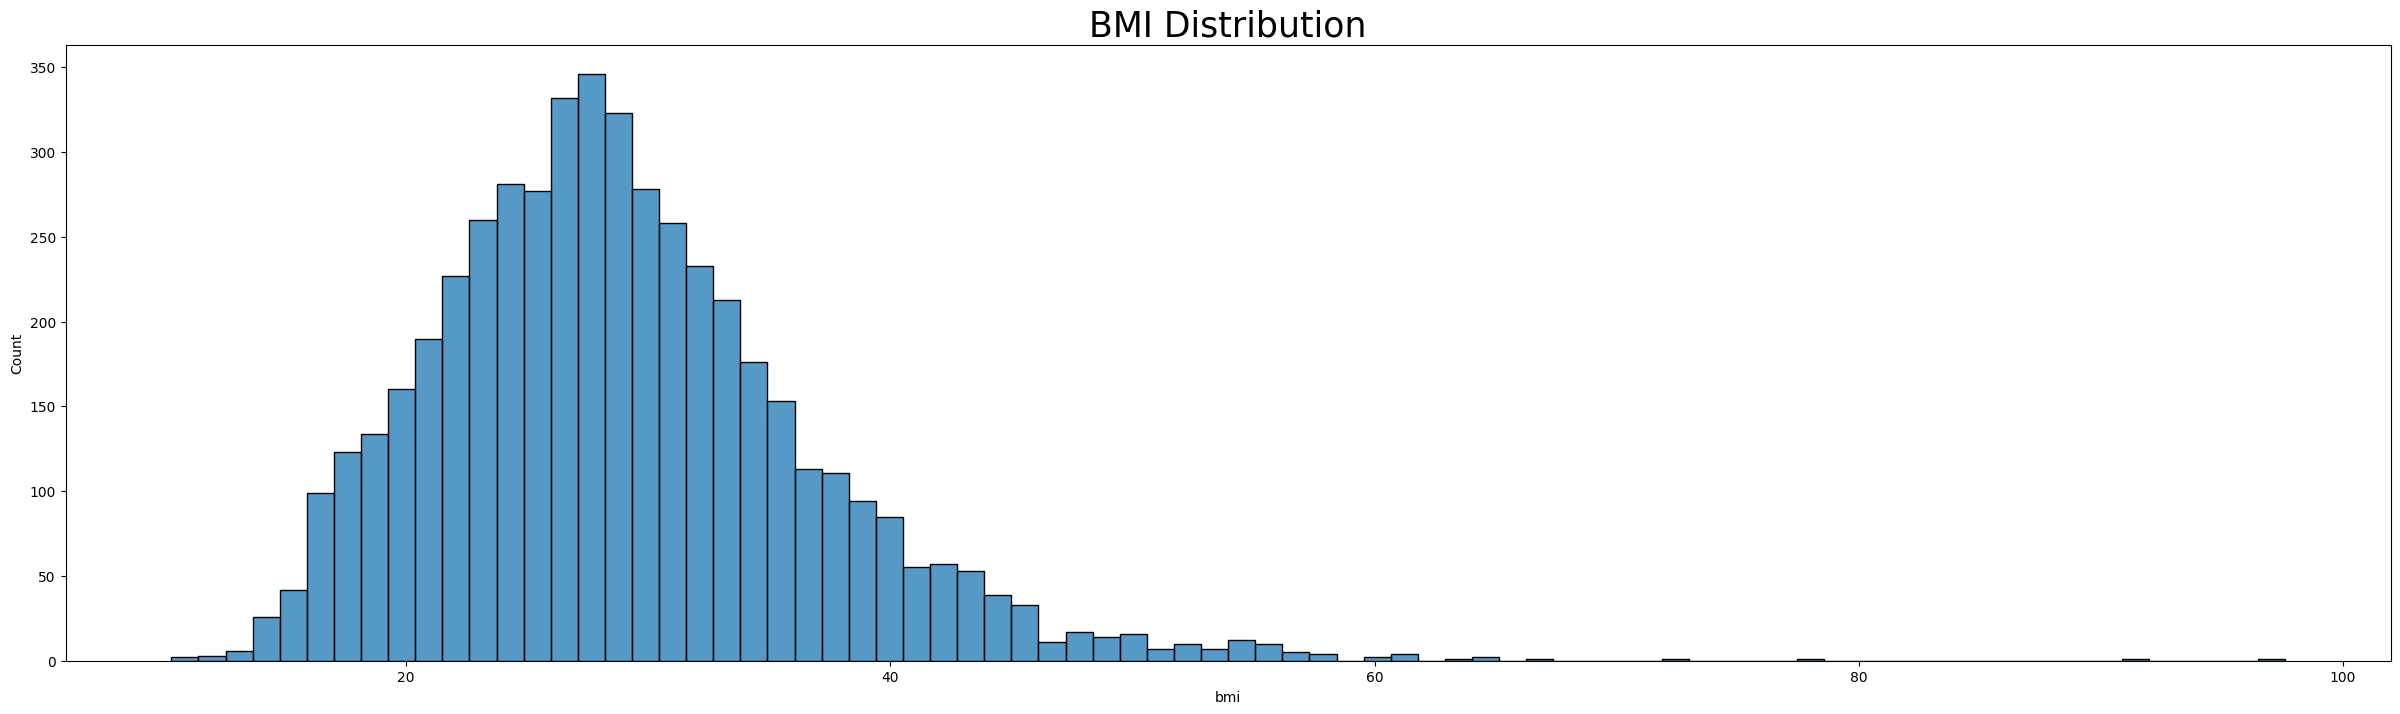

In [ ]:
#Since there are lot of value counts, let's  plot it, to get an idea about its' distribution.
plt.rcParams['figure.figsize']=(30,8)
sns.histplot(df['bmi'])
plt.title('BMI Distribution', fontsize=25)
plt.show()

In [ ]:
import random
df.bmi.fillna(np.random.uniform(25,29),inplace=True)

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Since, we can easily see there's a class imbalance and that may lead to very poor results. We will use SMOTE, **Synthetic Minority Oversampling Technique**(SMOTE) is an oversampling technique and widely used to handle the imbalanced dataset. Through this, we will synthesize new data points for minority class and oversample that class.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,1,1,228.69,36.600000,1,1
1,1,61.0,0,0,1,2,0,202.21,26.671285,2,1
2,0,80.0,0,1,1,1,0,105.92,32.500000,2,1
3,1,49.0,0,0,1,1,1,171.23,34.400000,3,1
4,1,79.0,1,0,1,2,0,174.12,24.000000,2,1


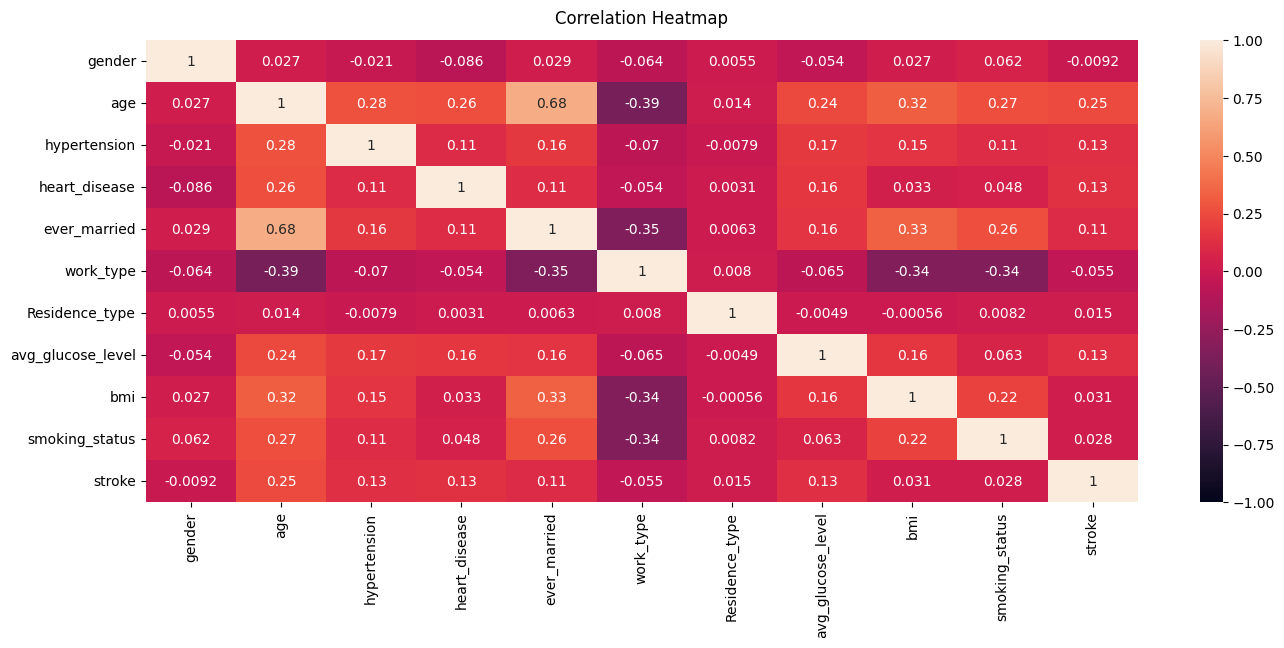

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
#heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [ ]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.586301,43.226614,0.097456,0.054012,0.656164,1.816438,0.508023,106.147677,28.805837,1.376908,0.048728
std,0.492941,22.612647,0.296607,0.226063,0.475034,1.105673,0.499985,45.283560,7.710128,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.885000,27.700000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [ ]:
import scipy
import math
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix ,f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import plotly.express as px

In [ ]:
x = df.iloc[:, 0:10]
y = df.iloc[:, -1]

In [ ]:
print(x.shape)
print(y.shape)

(5110, 10)
(5110,)


In [ ]:
X,Y=SMOTE().fit_resample(x,y)

In [ ]:
print(X.shape)
print(Y.shape)

(9722, 10)
(9722,)


In [ ]:
unique_elements, counts_elements = np.unique(Y, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [4861 4861]]


In [ ]:
unique_elements, counts_elements = np.unique(X, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[0.00000000e+00 8.00000000e-02 1.60000000e-01 ... 2.70865161e+02
  2.70988832e+02 2.71740000e+02]
 [3.45030000e+04 2.00000000e+00 3.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
standard_scale = StandardScaler()
x_train_scaled = standard_scale.fit_transform(x_train)

In [ ]:
#Random Forest Classifier

In [ ]:
random_forest=RandomForestClassifier(n_estimators=500)
random_forest.fit(x_train_scaled, y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
y_train_pred_random_forest=cross_val_predict(random_forest, x_train_scaled, y_train, cv=5)

In [ ]:
confusion_matrix_random_forest = confusion_matrix(y_train, y_train_pred_random_forest)
confusion_matrix_random_forest

array([[3517,  355],
       [ 161, 3744]])

In [ ]:
print(accuracy_score(y_train, y_train_pred_random_forest))
print(precision_score(y_train, y_train_pred_random_forest))
print(recall_score(y_train, y_train_pred_random_forest))
print(f1_score(y_train, y_train_pred_random_forest))

0.9336505079079337
0.9133935106123445
0.9587708066581306
0.9355322338830585


In [ ]:
#Logistic Regression

In [ ]:
logistic_regression=LogisticRegression(max_iter=10000)
logistic_regression.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_train_pred_log=cross_val_predict(logistic_regression, x_train_scaled, y_train, cv=5)

In [ ]:
confusion_matrix_log = confusion_matrix(y_train, y_train_pred_log)
confusion_matrix_log

array([[3090,  782],
       [ 660, 3245]])

In [ ]:
print(accuracy_score(y_train, y_train_pred_log))
print(precision_score(y_train, y_train_pred_log))
print(recall_score(y_train, y_train_pred_log))
print(f1_score(y_train, y_train_pred_log))

0.8145814581458146
0.8058107772535387
0.8309859154929577
0.8182047402924861


In [ ]:
#Adaboost Classifier

In [ ]:
adaboost_classifier=AdaBoostClassifier(
    RandomForestClassifier(), n_estimators=500, algorithm="SAMME.R", learning_rate=0.5)
adaboost_classifier.fit(x_train_scaled, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(), learning_rate=0.5,
                   n_estimators=500)

In [ ]:
y_train_pred_adaboost=cross_val_predict(adaboost_classifier, x_train_scaled, y_train, cv=5)

In [ ]:
confusion_matrix_adaboost = confusion_matrix(y_train, y_train_pred_adaboost)
confusion_matrix_adaboost

array([[3512,  360],
       [ 165, 3740]])

In [ ]:
print(accuracy_score(y_train, y_train_pred_adaboost))
print(precision_score(y_train, y_train_pred_adaboost))
print(recall_score(y_train, y_train_pred_adaboost))
print(f1_score(y_train, y_train_pred_adaboost))

0.9324932493249325
0.9121951219512195
0.9577464788732394
0.9344159900062461


In [ ]:
#SGD Classifier

In [ ]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(x_train_scaled, y_train)

SGDClassifier(random_state=42)

In [ ]:
y_train_pred_sgd_clf=cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=5)

In [ ]:
confusion_matrix_sgd_clf = confusion_matrix(y_train, y_train_pred_sgd_clf)
confusion_matrix_sgd_clf

array([[3108,  764],
       [ 803, 3102]])

In [ ]:
print(accuracy_score(y_train, y_train_pred_sgd_clf))
print(precision_score(y_train, y_train_pred_sgd_clf))
print(recall_score(y_train, y_train_pred_sgd_clf))
print(f1_score(y_train, y_train_pred_sgd_clf))

0.7985084222707985
0.8023797206414899
0.7943661971830986
0.7983528503410113


In [ ]:
#K nearest Neighbours

In [ ]:
k_neig=KNeighborsClassifier(n_neighbors=15)
k_neig.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_train_pred_k_neig=cross_val_predict(k_neig, x_train_scaled, y_train, cv=5)

In [ ]:
confusion_matrix_k_neig = confusion_matrix(y_train, y_train_pred_k_neig)
confusion_matrix_k_neig

array([[2964,  908],
       [ 321, 3584]])

In [ ]:
print(accuracy_score(y_train, y_train_pred_k_neig))
print(precision_score(y_train, y_train_pred_k_neig))
print(recall_score(y_train, y_train_pred_k_neig))
print(f1_score(y_train, y_train_pred_k_neig))

0.841969911276842
0.7978628673196795
0.917797695262484
0.8536382041205192


In [ ]:
#Voting Classifier

In [ ]:
voting_clf=VotingClassifier(
    estimators=[('lr', logistic_regression), ('rf', random_forest), ('kn', k_neig)], voting='soft')
voting_clf.fit(x_train_scaled, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=10000)),
                             ('rf', RandomForestClassifier(n_estimators=500)),
                             ('kn', KNeighborsClassifier(n_neighbors=15))],
                 voting='soft')

In [ ]:
y_train_pred_voting_clf=cross_val_predict(voting_clf, x_train_scaled, y_train, cv=5)

In [ ]:
print(accuracy_score(y_train, y_train_pred_voting_clf))
print(precision_score(y_train, y_train_pred_voting_clf))
print(recall_score(y_train, y_train_pred_voting_clf))
print(f1_score(y_train, y_train_pred_voting_clf))
print(x_train.shape)

0.8887745917448888
0.855638745905475
0.9364916773367478
0.8942413497982639
(7777, 10)


In [ ]:
#Neural Networks

In [ ]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
seed_value=42
import tensorflow as tf
tf.random.set_seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import random
random.seed(seed_value)

In [ ]:
model = Sequential()
#model.add(tf.keras.layers.Flatten())
model.add(Dense(16,activation='relu', input_shape = (None, 5696, 10)))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',
             loss='binary_crossentropy')


history = model.fit(x_train_scaled, y_train, epochs=200, validation_split=0.2, shuffle=True)

Epoch 1/200
195/195 [==============================] - 6s 18ms/step - loss: 0.5794 - val_loss: 0.5083
Epoch 2/200
195/195 [==============================] - 1s 4ms/step - loss: 0.4539 - val_loss: 0.3685
Epoch 3/200
195/195 [==============================] - 1s 3ms/step - loss: 0.3877 - val_loss: 0.3618
Epoch 4/200
195/195 [==============================] - 1s 3ms/step - loss: 0.3778 - val_loss: 0.3573
Epoch 5/200
195/195 [==============================] - 1s 3ms/step - loss: 0.3677 - val_loss: 0.3522
Epoch 6/200
195/195 [==============================] - 1s 3ms/step - loss: 0.3609 - val_loss: 0.3424
Epoch 7/200
195/195 [==============================] - 1s 3ms/step - loss: 0.3549 - val_loss: 0.3434
Epoch 8/200
195/195 [==============================] - 1s 3ms/step - loss: 0.3501 - val_loss: 0.3404
Epoch 9/200
195/195 [==============================] - 1s 3ms/step - loss: 0.3445 - val_loss: 0.3343
Epoch 10/200
195/195 [==============================] - 1s 3ms/step - loss: 0.3384 - val_l

In [ ]:
#9 layers dense
#prediction = model.predict(x_train_scaled).astype("int32")
#predict_x=model.predict(x_train_scaled)
#prediction=np.argmax(predict_x,axis=1)
prediction=(model.predict(x_train_scaled) > 0.5).astype("int32")
confusion_matrix_ann = confusion_matrix(y_train, prediction)
confusion_matrix_ann

244/244 [==============================] - 1s 2ms/step


array([[3479,  393],
       [ 181, 3724]])

In [ ]:
confusion_matrix_voting_clf = confusion_matrix(y_train, y_train_pred_voting_clf)
confusion_matrix_voting_clf

array([[3255,  617],
       [ 248, 3657]])

In [ ]:
print(accuracy_score(y_train, prediction))
print(precision_score(y_train, prediction))
print(recall_score(y_train, prediction))
print(f1_score(y_train, prediction))
print(history.history)

0.9261926192619262
0.9045421423366529
0.9536491677336748
0.9284467713787086
{'loss': [0.579354465007782, 0.45387983322143555, 0.3877054750919342, 0.37783026695251465, 0.36766380071640015, 0.3609336018562317, 0.3549264967441559, 0.3501063585281372, 0.3445047438144684, 0.3383607864379883, 0.3341032564640045, 0.32829195261001587, 0.3267675042152405, 0.32168734073638916, 0.3174530267715454, 0.3132764399051666, 0.31175023317337036, 0.3080574572086334, 0.30783694982528687, 0.30459439754486084, 0.3004637360572815, 0.29872217774391174, 0.29478684067726135, 0.29484257102012634, 0.29522985219955444, 0.29096198081970215, 0.2873162627220154, 0.2845536172389984, 0.2822723686695099, 0.2849271893501282, 0.280307799577713, 0.27562397718429565, 0.2767304480075836, 0.2740360498428345, 0.27224966883659363, 0.27164405584335327, 0.2710963487625122, 0.27143579721450806, 0.27085888385772705, 0.271464467048645, 0.2638692855834961, 0.263791024684906, 0.2640294134616852, 0.26467007398605347, 0.26192283630371094

dict_keys(['loss', 'val_loss'])


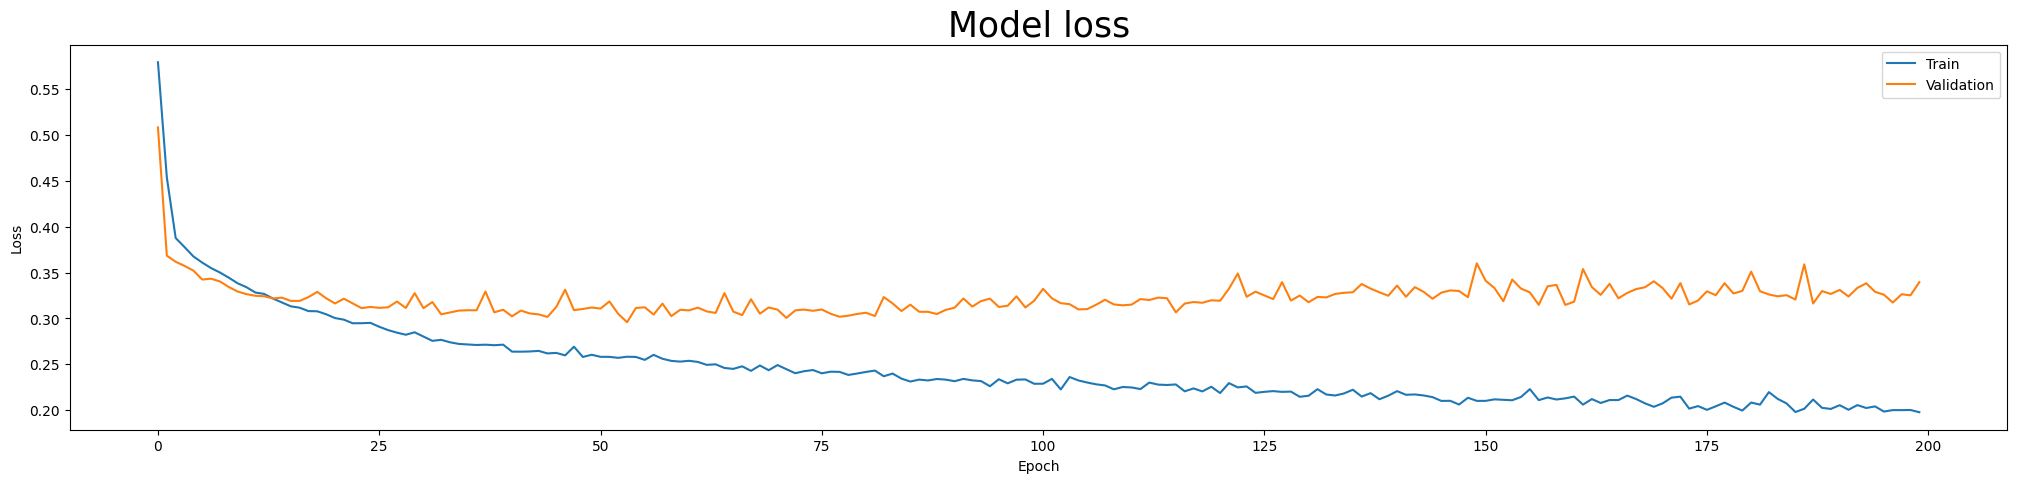

In [ ]:
print(history.history.keys())
plt.rcParams['figure.figsize']=(25,5)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss',fontsize =25)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
#With the given scores, we can easily see that the random forest performes the best, so lets pickle that model.

In [ ]:
import pickle
pickle.dump(random_forest, open('stroke_clf.pkl', 'wb'))

In [ ]:
random_forest.predict_proba([[0, 30,  0,  0,  0,
        0, 0, 120, 22, 0]])

array([[0.652, 0.348]])